# ANALYSIS 2: PHÂN TÍCH DỮ LIỆU HỌC SINH
---

In [1]:
#Gọi các thư viện sử dụng
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mount tới Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Mô tả tập dữ liệu
---
Tập dữ liệu StudentsPerformance.csv lưu trữ dữ liệu về 1000 em học sinh, bao gồm 8 thuộc tính:
1. Gender: - Giới tính (Male | Female)
2. Race/ethnicity - Dân tộc: 4 giá trị: Group A; Group B, Group C, Group D, Group E
3. Parental level of education - Trình độ học vấn của Cha mẹ học sinh: gồm 6 giá trị: some college;associate's degree, high school, some high school, bachelor's degree, master's degree
4. Lunch - Chế độ ăn trưa của học sinh: Gồm 2 giá trị (standard, free/reduced)
5. Test preparation course - Khóa học chuẩn bị cho bài kiểm tra: Gồm 2 giá trị (none, completed)
6. Math score - Điểm môn toán
7. Reading score - Điểm môn đọc
8. Writing score - Điểm môn viết

Tập dữ liệu đầy đủ, ko chứa giá trị missing. đã được chuẩn bị và làm sạch


In [4]:
path='/content/drive/My Drive/Colab Notebooks/10Project/Data_Analysis/StudentsPerformance.csv'
data_student = pd.read_csv(path)
data_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2) Quan sát các đặc trưng của tập dữ liệu
--- 

In [12]:
#Quan sát đặc trưng thống kê với thuộc tính số
data_student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
#Quan sát đặc trưng thống kê với thuộc tính Object
data_student.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [24]:
#1. Thống kê theo giới tính
t = data_student['gender'].value_counts()
t

female    518
male      482
Name: gender, dtype: int64

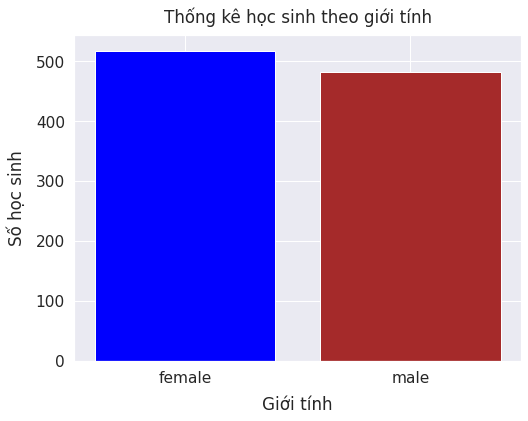

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8,6))
plt.bar(t.index,t.values, color=['blue', 'brown'])
plt.xlabel("Giới tính", labelpad=10)
plt.ylabel("Số học sinh", labelpad=10)
plt.title("Thống kê học sinh theo giới tính", y=1.02);


In [31]:
#2. Thống kê theo dân tộc
t2 = data_student['race/ethnicity'].value_counts()
t2

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

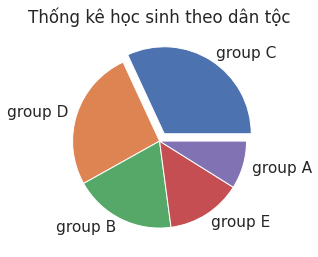

In [32]:
plt.pie(t2.values,labels=t2.index, explode=(0.1, 0,0,0,0))
plt.title("Thống kê học sinh theo dân tộc", y=1.02);
plt.show()

In [33]:
#3. Thống kê theo Trình độ học vấn của cha mẹ học sinh
t3= data_student['parental level of education'].value_counts()
t3

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

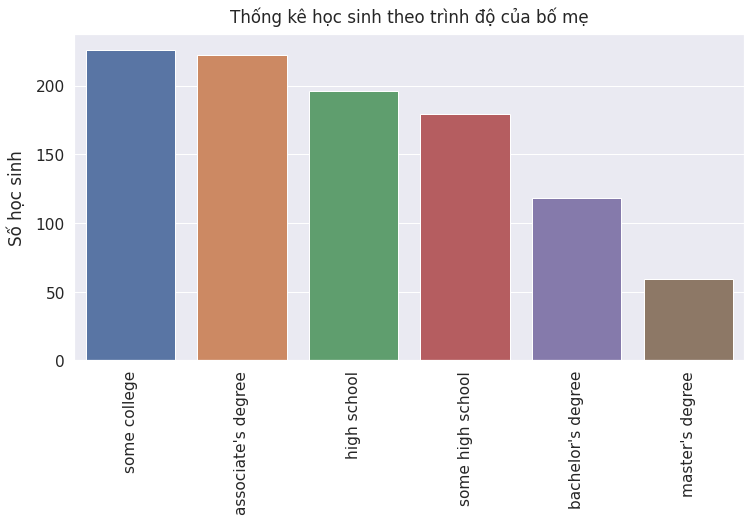

In [36]:
sns.set(font_scale=1.4)
plt.figure(figsize=(12,6))
sns.barplot(t3.index,t3.values)
#plt.xlabel("Giới tính", labelpad=10)
plt.ylabel("Số học sinh", labelpad=10)
plt.xticks(rotation=90)
plt.title("Thống kê học sinh theo trình độ của bố mẹ", y=1.02);


In [10]:
#Thống kê theo Trình độ học vấn của cha mẹ học sinh
data_student['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [11]:
#Thống kê theo Trình độ học vấn của cha mẹ học sinh
data_student['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64